<a href="https://colab.research.google.com/github/MulanSchneeberg/Deep-Learning-With-Python/blob/master/newswires_Single_label_MulticlassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
import numpy as np

In [176]:
(train_data, train_label),(test_data, test_label)=reuters.load_data(num_words=10000)

In [177]:
train_data.shape

(8982,)

In [178]:
train_label.shape

(8982,)

In [179]:
test_data.shape

(2246,)

In [180]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [181]:
len(train_data[0])

87

In [182]:
train_label[0]

3

In [183]:
def vectorize_sequence(input, dimensions=10000):
  result=np.zeros((len(input), dimensions))
  for i, input in enumerate(input):
    for j in (input):
      result[i, j]=1.
  return result

In [184]:
x_train=vectorize_sequence(train_data)
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [185]:
x_train.shape

(8982, 10000)

In [186]:
x_test=vectorize_sequence(test_data)
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [187]:
x_test.shape

(2246, 10000)

In [188]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(train_label)
y_train.shape

(8982, 46)

In [189]:
y_test=to_categorical(test_label)
y_test.shape

(2246, 46)

In [190]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model=Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax'),
])

In [191]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [192]:
history=model.fit(x_train[:1000], y_train[:1000], epochs=20, batch_size=512, validation_data=(x_train[1000:], y_train[1000:]))

Epoch 1/20
2/2 [==============================] - 1s 713ms/step - loss: 3.7239 - accuracy: 0.2760 - val_loss: 3.4195 - val_accuracy: 0.4308
Epoch 2/20
2/2 [==============================] - 0s 371ms/step - loss: 3.2188 - accuracy: 0.4910 - val_loss: 2.9615 - val_accuracy: 0.4910
Epoch 3/20
2/2 [==============================] - 0s 382ms/step - loss: 2.6653 - accuracy: 0.5410 - val_loss: 2.5796 - val_accuracy: 0.5213
Epoch 4/20
2/2 [==============================] - 0s 376ms/step - loss: 2.1752 - accuracy: 0.5950 - val_loss: 2.2776 - val_accuracy: 0.5491
Epoch 5/20
2/2 [==============================] - 0s 376ms/step - loss: 1.7931 - accuracy: 0.6520 - val_loss: 2.0788 - val_accuracy: 0.5673
Epoch 6/20
2/2 [==============================] - 0s 361ms/step - loss: 1.5088 - accuracy: 0.6990 - val_loss: 1.9366 - val_accuracy: 0.5854
Epoch 7/20
2/2 [==============================] - 0s 366ms/step - loss: 1.2993 - accuracy: 0.7470 - val_loss: 1.8352 - val_accuracy: 0.6102
Epoch 8/20
2/2 [====

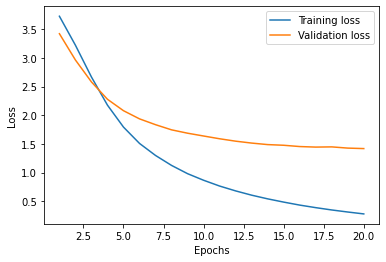

In [193]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values,label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

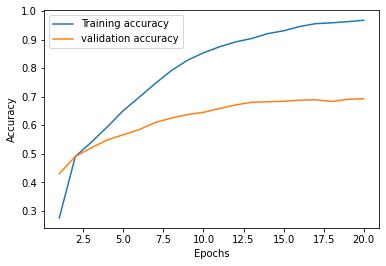

In [194]:
plt.clf()
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
epochs=range(1, len(loss_values)+1)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc ,label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [195]:
results=model.evaluate(x_test, y_test)
results

71/71 [==============================] - 0s 3ms/step - loss: 1.4564 - accuracy: 0.6910


[1.4564470052719116, 0.6910062432289124]